# Track Composition

**Motivation:** It seems like with the looser track selection, we want to use the $|s_{d0}|$ sort instead of the $s_{d0}$ sort, so I'm going to try to demonstrate this here.


In [1]:
import numpy as np
import h5py
import sys
import os
import pandas as pd
import xarray as xr
from glob import glob

sys.path.append("../..")
from usefulFcts import *
from trainNet import DIPS
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (

Tracks with the mask `jet_trk_ip3d_grade != -10` mask and the $s_{d0}$ sort

In [3]:
dataDir = '../../data/mc16d_PFlow_BTagging201903_ttbar'

In [ ]:
# nTrks = 15
# sortFlag = 'sd0_rev'

# dataTag = f'400k_{nTrks}trks_{sortFlag}'
# j_ip3d_mask_sd0 = pd.read_hdf(      f'{dataDir}/jet_{dataTag}.h5', key='jet_df')
# t_ip3d_mask_sd0 = xr.open_dataarray(f'{dataDir}/trk_{dataTag}.nc')

Tracks with the ip3d $p_T$ and ip3d cuts, the tracking group's Loose quality cuts, and the $s_{d0}$ sort

In [10]:
nTrks = 15
sortFlag = 'sd0_rev'
trkSelection = '_pt_1000_d0_1_z0_1.5'

dataTag = f'3mtest_{nTrks}trks_{sortFlag}'
j_ip3d_Loose_sd0 = pd.read_hdf(      f'{dataDir+trkSelection}/jet_{dataTag}.h5', key='jet_df')
t_ip3d_Loose_sd0 = xr.open_dataarray(f'{dataDir+trkSelection}/trk_{dataTag}.nc')

Tracks with the jf $p_T$ and ip3d cuts, the tracking group's Loose quality cuts, and the $s_{d0}$ sort

In [5]:
nTrks = 25
sortFlag = 'sd0_rev'
trkSelection = '_pt_500_d0_3.5_z0_5'

dataTag = f'3mtest_{nTrks}trks_{sortFlag}'
j_jf_Loose_sd0 = pd.read_hdf(      f'{dataDir+trkSelection}/jet_{dataTag}.h5', key='jet_df')
t_jf_Loose_sd0 = xr.open_dataarray(f'{dataDir+trkSelection}/trk_{dataTag}.nc')

Tracks with the jf $p_T$ and ip3d cuts, the tracking group's Loose quality cuts, and the $|s_{d0}|$ sort

In [ ]:
#sortFlag = 'abs_sd0_rev'

dataTag = f'400k_{nTrks}trks_{sortFlag}'
j_jf_Loose_absSd0 = pd.read_hdf(      f'{dataDir+trkSelection}/jet_{dataTag}.h5', key='jet_df')
t_jf_Loose_absSd0 = xr.open_dataarray(f'{dataDir+trkSelection}/trk_{dataTag}.nc')

In [7]:
# index = ['ip3d mask $s_{d0}$ sort','ip3d + Loose $s_{d0}$ sort',
#          'jf + Loose $s_{d0}$ sort','jf + Loose $|s_{d0}|$ sort']

index = ['ip3d mask','ip3d + Loose','jf + Loose']

cols  = ['nTrk','nTrk_HF','nTrk_frag','nTrk_GEANT','nTrk_PU']

table = pd.DataFrame(0,index,cols)
stdev   = pd.DataFrame(0,index,cols)

In [ ]:
t_ip3d_Loose_sd0.loc[0,:,'d0']

In [ ]:
t_ip3d_Loose_sd0.loc[0,:,'ip3d_d0']

In [ ]:
for i, df in zip(index,[j_ip3d_mask_sd0, j_ip3d_Loose_sd0, j_jf_Loose_sd0]):#, j_jf_Loose_absSd0]):
    
    for c in cols:
        table.loc[i,c] = np.mean(df[c])
        stdev.loc[i,c] = np.std(df[c])

In [ ]:
table.round(3)

**Ok - there's something that I'm not understanding, how does adding an extra cut *increase* the track multiplicity**?

I don't know ;( but it seems like it *has* to be something with the quality... 

I tried to check the jet to track association, and it seems like this is done for the tracks read into the opt fw.

**Try checking the trk$\rightarrow$jet association cone**

In [ ]:
X = t_ip3d_Loose_sd0.values

In [ ]:
trkMask = np.any(X!=0,axis=-1)

In [ ]:
trkMask

In [ ]:
trkMask.shape

In [ ]:
j_ip3d_Loose_sd0['nTrk'].head()

In [ ]:
jpts = j_ip3d_Loose_sd0['pt_orig'].values.reshape(-1,1).repeat(15)[trkMask]

In [ ]:
t_ip3d_Loose_sd0.loc[0,:,'dr'].values.shape

In [ ]:
tdrs = t_ip3d_Loose_sd0.loc[:,:,'dr'].values[trkMask]

jpts = j_ip3d_Loose_sd0['pt_orig'].values.reshape(-1,1).repeat(15,axis=1)[trkMask]

In [ ]:
from usefulFcts import ftag_cone

In [ ]:
ti = 10000

plt.scatter(jpts[:ti],tdrs[:ti],2,alpha=0.5)

xi = np.linspace(0,400)
plt.plot(xi, ftag_cone(xi), 'k')

plt.xlabel("jet $p_T$ [GeV] (original)",fontsize=14)
plt.ylabel("$\Delta R$(trk, jet)",fontsize=14)

plt.xlim(0,400)

plt.show()

In [ ]:
dRcuts = ftag_cone(jpts[:ti])

In [ ]:
np.sum(tdrs[:ti] > dRcuts)

Recall: there shouldn't be any dependence on the sorting when I'm pulling these quantities out of the jet df.

In [ ]:
stdev.round(1)

Ok, good to know - these standard deviations are *huge* - how do I even report this?

But this even means that with the JF cuts, I *should* be able to get away with just 15 tracks (right?).


In [ ]:
t_jf_Loose_absSd0.values.shape

In [ ]:
np.sum(t_jf_Loose_absSd0.values!=0,axis=-1).shape

In [ ]:
len(x1['nTrk'])

In [12]:
# x1 = {k:[] for k in cols}
# x2 = {k:[] for k in cols}

# y1 = {k:[] for k in cols}
# y2 = {k:[] for k in cols}


# trkMask1 = (np.sum(t_ip3d_Loose_sd0.values!=0,   axis=-1) != 0)
# trkMask2 = (np.sum(t_jf_Loose_sd0.values!=0,axis=-1) != 0)

# orig1 = t_jf_Loose_sd0.loc[:,:,'orig'].values
# orig2 = t_jf_Loose_absSd0.loc[:,:,'orig'].values

# for i in range(1,nTrks+1):
    
#     for key, oi in zip(cols,[100,(0,1),2,3,-1]):
        
#         if oi == 100:
#             mask1 = trkMask1 
#             mask2 = trkMask2 
#         elif type(oi) == tuple:
#             mask1 = trkMask1 & ((orig1 == 0) | (orig1 == 1))
#             mask2 = trkMask2 & ((orig2 == 0) | (orig2 == 1)) 
#         else:
#             mask1 = trkMask1 & (orig1 == oi)
#             mask2 = trkMask2 & (orig2 == oi)
        
        
#         nTrk_i1 = np.sum((mask1)[:,:i],axis=1)
#         nTrk_i2 = np.sum((mask2)[:,:i],axis=1)
        
#         x1[key].append( np.mean(nTrk_i1) )
#         x2[key].append( np.mean(nTrk_i2) )

#         y1[key].append( np.mean(nTrk_i1 / j_jf_Loose_sd0[key]) )
#         y2[key].append( np.mean(nTrk_i2 / j_jf_Loose_absSd0[key]) )
        

Just plot the $s_{d0}$ sort line

In [15]:
x1 = {k:[] for k in cols}
x2 = {k:[] for k in cols}

y1 = {k:[] for k in cols}
y2 = {k:[] for k in cols}

trkMask1 = (np.sum(t_ip3d_Loose_sd0.values!=0,   axis=-1) != 0)
trkMask2 = (np.sum(t_jf_Loose_sd0.values!=0,axis=-1) != 0)

orig1 = t_ip3d_Loose_sd0.loc[:,:,'orig'].values
orig2 = t_jf_Loose_sd0.loc[:,:,'orig'].values

for i in range(1,26):
    
    for key, oi in zip(cols,[100,(0,1),2,3,-1]):
        
        if oi == 100:
            mask1 = trkMask1 
            mask2 = trkMask2 
        elif type(oi) == tuple:
            mask1 = trkMask1 & ((orig1 == 0) | (orig1 == 1))
            mask2 = trkMask2 & ((orig2 == 0) | (orig2 == 1)) 
        else:
            mask1 = trkMask1 & (orig1 == oi)
            mask2 = trkMask2 & (orig2 == oi)
        
        
        nTrk_i1 = np.sum((mask1)[:,:i],axis=1)
        nTrk_i2 = np.sum((mask2)[:,:i],axis=1)
        
        x1[key].append( np.mean(nTrk_i1) )
        x2[key].append( np.mean(nTrk_i2) )

        y1[key].append( np.mean(nTrk_i1 / j_ip3d_Loose_sd0[key]) )
        y2[key].append( np.mean(nTrk_i2 / j_jf_Loose_sd0[key]) )
        

In [16]:
title1='nominal track selection'
title2='loose track selection'

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"$\sqrt{s}$ = 13 TeV $t\bar{t}$"

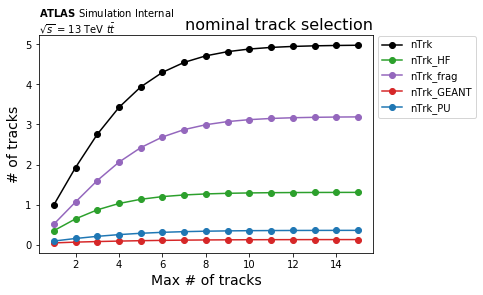

In [20]:
for x, title, nTrks in zip([x1,x2],[title1,title2],[15,25]):
    
    plt.figure()
    for c,color in zip(cols,['k','C2','C4','C3','C0']):

        plt.plot(np.arange(1,nTrks+1),x[c][:nTrks],color=color,
                 linestyle='-',marker='o',label=c)
        
    plt.xlabel('Max # of tracks',fontsize=14)
    plt.ylabel('# of tracks',fontsize=14)
    plt.legend(bbox_to_anchor=(1,1.02))

    ax = plt.gca()
    plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)
    plt.title(title,loc='right',fontsize=16)

    tag=title.split(' ')[0]
    plt.savefig(f'figures/nTrks_{tag}.pdf',bbox_inches='tight')

plt.show()

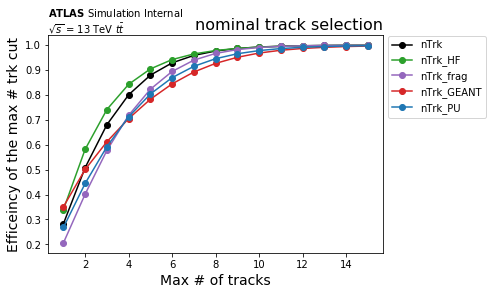

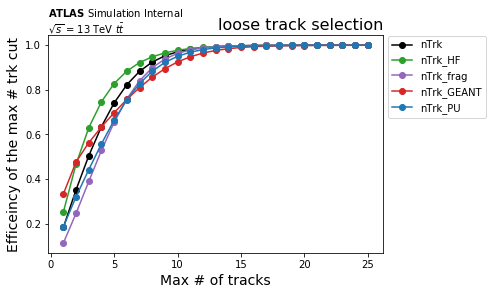

In [19]:
for y, title, nTrks in zip([y1,y2],[title1,title2],[15,25]):
    
    plt.figure()
    for c,color in zip(cols,['k','C2','C4','C3','C0']):

        plt.plot(np.arange(1,nTrks+1),y[c][:nTrks],color=color,
                 marker='o',label=c)
        
    plt.xlabel('Max # of tracks',fontsize=14)
    plt.ylabel('Efficeincy of the max # trk cut',fontsize=14)
    plt.legend(bbox_to_anchor=(1,1.02))

    ax = plt.gca()
    plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)
    plt.title(title,loc='right',fontsize=16)

    tag=title.split(' ')[0]
    plt.savefig(f'figures/nTrkEff_{tag}.pdf',bbox_inches='tight')


plt.show()

In [23]:
y1['nTrk'][-1]

0.9994862770803552

In [24]:
y2['nTrk'][-1]

0.9999746362855723

In [ ]:
# #for c,color in zip(cols,['k','C2','C4','C3','C0']):
# for c,color in zip(cols[1:],['C2','C4','C3','C0']):
   
#     plt.plot(np.arange(1,nTrks+1),y1[c],color=color,
#              linestyle='--',marker='o',
#              label=c.split('_')[1]+': $s_{d0}$ sort')
#     plt.plot(np.arange(1,nTrks+1),y2[c],color=color,
#              linestyle='-', marker='s',
#              label=c.split('_')[1]+': $|s_{d0}|$ sort')
    
# plt.xlabel('Max # of tracks',fontsize=14)
# plt.ylabel('Efficeincy of the max # trk cut',fontsize=14) 
# plt.legend(loc='lower right')

# ax = plt.gca()
# plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)
# plt.title(title,loc='right',fontsize=16)

# plt.savefig(f'figures/nTrkEff_jf_cfSorts_max{nTrks}.pdf',bbox_inches='tight')

# plt.show()

A lot more geant and PU tracks with the $|s_{d0}|$ sort, and more fragmentation tracks with the $|s_{d0}|$ sort.

So based on this, I would be very *surprised* if the sort made a difference for DIPS.

In [ ]:
y1['nTrk'][-1],y2['nTrk'][-1]

In [ ]:
y1['nTrk_HF'][-1],y2['nTrk_HF'][-1]

In [ ]:
y1['nTrk_PU'][-1],y2['nTrk_PU'][-1]

Also - there's *no* difference between the sorts for the JF track selection

**Bonus challenge:** How *loose* can we go?? In Run 3, we'll have tracks with $|d_0|$ up to 8 mm (I should check Thomas's talk though), and apparently *no* $|z_0 \sin \theta|$ cut - so if I'm feeding the IPs and $z_0$s in as input, it seems like I should be able to learn these dependencies... Or at least, it seems like it's worth a shot!!

## Table for the paper

In [2]:
models = ['pt_1000_d0_1_z0_1.5', 'pt_500_d0_3.5_z0_5', 'pt_500_d0_8_z0_10']

index = [tag+maxTrk.format(nTrks) for nTrks, tag in zip([15, 25, 25],models) for maxTrk in ['','_max_{}trks']]

models = ['pt_1000_d0_1_z0_1.5', 'pt_500_d0_3.5_z0_5', 'pt_500_d0_8_z0_10']

cols  = ['nTrk','nTrk_HF','nTrk_frag','nTrk_GEANT','nTrk_PU']

table = pd.DataFrame(0,index,cols)
stdev   = pd.DataFrame(0,index,cols)

In [3]:
dataDir = '../../data'
sortFlag = 'sd0_rev'

for nTrks, tag in zip([15, 25, 25],models):
    
    # Get the jet df and track xarray
    subDir = 'mc16d_PFlow_BTagging201903_ttbar_' + tag
    
    dataTag  = "3mtest_{}trks_{}".format(nTrks, sortFlag)
    jdf = pd.read_hdf(      f'{dataDir}/{subDir}/jet_{dataTag}.h5', key='jet_df')
    txr = xr.open_dataarray(f'{dataDir}/{subDir}/trk_{dataTag}.nc')
    
    
    X_trk = txr.loc[:,:,['sd0','sz0','pt','orig']].values
    orig = X_trk[:,:,-1]
    
    trkMask = ~ np.any(X_trk==0,axis=-1)
    print(tag, trkMask.shape)
    
    for c, oi in zip(cols,[100,(0,1),2,3,-1]):
        
        table.loc[tag, c] = jdf[c].mean()
        stdev.loc[tag, c] = jdf[c].std()
        
        # Now fill in the columns for when we have a cut on the maximum number of tracks
        if oi == 100:
            mask = trkMask 
        elif type(oi) == tuple:
            mask = trkMask & ((orig == 0) | (orig == 1))
        else:
            mask = trkMask & (orig == oi)
        
        
        nTrk_i = np.sum(mask,axis=1)
        
        key = tag+f'_max_{nTrks}trks'
        table.loc[key,c]  = nTrk_i.mean() 
        stdev.loc[key,c] = nTrk_i.std()



pt_1000_d0_1_z0_1.5 (3000000, 15)
pt_500_d0_3.5_z0_5 (3000000, 25)
pt_500_d0_8_z0_10 (3000000, 25)


In [4]:
table

nTrk   nTrk_HF  nTrk_frag  nTrk_GEANT  \
pt_1000_d0_1_z0_1.5             4.988349  1.306269   3.196782    0.127105   
pt_1000_d0_1_z0_1.5_max_15trks  4.431601  0.758278   3.189727    0.126583   
pt_500_d0_3.5_z0_5              7.136272  1.492046   3.881550    0.260410   
pt_500_d0_3.5_z0_5_max_25trks   6.509642  0.866128   3.881122    0.260353   
pt_500_d0_8_z0_10               8.405222  1.502096   3.903917    0.349751   
pt_500_d0_8_z0_10_max_25trks    7.772973  0.871866   3.903102    0.349592   

                                 nTrk_PU  
pt_1000_d0_1_z0_1.5             0.358193  
pt_1000_d0_1_z0_1.5_max_15trks  0.357013  
pt_500_d0_3.5_z0_5              1.502266  
pt_500_d0_3.5_z0_5_max_25trks   1.502038  
pt_500_d0_8_z0_10               2.649459  
pt_500_d0_8_z0_10_max_25trks    2.648413

In [5]:
stdev

nTrk   nTrk_HF  nTrk_frag  nTrk_GEANT  \
pt_1000_d0_1_z0_1.5             2.756073  1.912557   2.499633    0.389631   
pt_1000_d0_1_z0_1.5_max_15trks  2.557983  1.212605   2.466357    0.388500   
pt_500_d0_3.5_z0_5              3.259584  2.128755   2.736650    0.582682   
pt_500_d0_3.5_z0_5_max_25trks   3.128764  1.332669   2.733753    0.582549   
pt_500_d0_8_z0_10               3.743035  2.140827   2.746646    0.696429   
pt_500_d0_8_z0_10_max_25trks    3.644717  1.339259   2.742040    0.696044   

                                 nTrk_PU  
pt_1000_d0_1_z0_1.5             0.744573  
pt_1000_d0_1_z0_1.5_max_15trks  0.741810  
pt_500_d0_3.5_z0_5              1.777248  
pt_500_d0_3.5_z0_5_max_25trks   1.776683  
pt_500_d0_8_z0_10               2.686096  
pt_500_d0_8_z0_10_max_25trks    2.681912

In [6]:
jets = [f'{f}-jets' for f in ['l','c','b']]

idx = pd.MultiIndex.from_product([jets, index],
                                 names=['jet flavour','track selection'])

In [7]:
flav = pd.DataFrame(0,idx,cols)
err  = pd.DataFrame(0,idx,cols)

In [8]:
dataDir = '../../data'
sortFlag = 'sd0_rev'

for nTrks, tag in zip([15, 25, 25],models):
    
    # Get the jet df and track xarray
    subDir = 'mc16d_PFlow_BTagging201903_ttbar_' + tag
    
    dataTag  = "3mtest_{}trks_{}".format(nTrks, sortFlag)
    jdf = pd.read_hdf(      f'{dataDir}/{subDir}/jet_{dataTag}.h5', key='jet_df')
    txr = xr.open_dataarray(f'{dataDir}/{subDir}/trk_{dataTag}.nc')
    
    
    X_trk = txr.loc[:,:,['sd0','sz0','pt','orig']].values
    orig = X_trk[:,:,-1]
    
    trkMask = ~ np.all(X_trk==0,axis=-1)
    print(tag, trkMask.shape)
    
    for pdg, j in zip([0,4,5],jets):
        
        for c, oi in zip(cols,[100,(0,1),2,3,-1]):

            flav.loc[(j,tag), c] = jdf.loc[jdf.LabDr_HadF==pdg, c].mean()
            err.loc[(j,tag), c] = jdf.loc[jdf.LabDr_HadF==pdg, c].std()

            # Now fill in the columns for when we have a cut on the maximum number of tracks
            if oi == 100:
                mask = trkMask 
            elif type(oi) == tuple:
                print(f'Getting HF tracks in {j}')
                mask = trkMask & ((orig == 0) | (orig == 1))
            else:
                mask = trkMask & (orig == oi)


            nTrk_i = np.sum(mask[jdf.LabDr_HadF==pdg],axis=1)

            key = (j,tag+f'_max_{nTrks}trks')
            flav.loc[key,c]  = nTrk_i.mean() 
            err.loc[key,c] = nTrk_i.std()

    #break

pt_1000_d0_1_z0_1.5 (3000000, 15)
Getting HF tracks in l-jets
Getting HF tracks in c-jets
Getting HF tracks in b-jets
pt_500_d0_3.5_z0_5 (3000000, 25)
Getting HF tracks in l-jets
Getting HF tracks in c-jets
Getting HF tracks in b-jets
pt_500_d0_8_z0_10 (3000000, 25)
Getting HF tracks in l-jets
Getting HF tracks in c-jets
Getting HF tracks in b-jets


In [9]:
mask = trkMask & ((orig == 0) | (orig == 1))

In [10]:
orig[0]

array([-1., -1., -1.,  2., -1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      dtype=float32)

In [11]:
jdf.loc[0,['LabDr_HadF','nTrk','nTrk_HF']]

LabDr_HadF    0.0
nTrk          9.0
nTrk_HF       0.0
Name: 0, dtype: float64

In [12]:
trkMask[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [13]:
mask[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [17]:
flav.round(1)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


nTrk  nTrk_HF  nTrk_frag  \
jet flavour track selection                                            
l-jets      pt_1000_d0_1_z0_1.5              4.6      0.0        4.1   
            pt_1000_d0_1_z0_1.5_max_15trks   4.6      0.0        4.1   
            pt_500_d0_3.5_z0_5               6.8      0.0        5.0   
            pt_500_d0_3.5_z0_5_max_25trks    6.8      0.0        5.0   
            pt_500_d0_8_z0_10                8.2      0.0        5.0   
            pt_500_d0_8_z0_10_max_25trks     8.2      0.0        5.0   
c-jets      pt_1000_d0_1_z0_1.5              5.1      1.7        2.9   
            pt_1000_d0_1_z0_1.5_max_15trks   5.1      1.7        2.9   
            pt_500_d0_3.5_z0_5               7.1      1.8        3.6   
            pt_500_d0_3.5_z0_5_max_25trks    7.1      1.8        3.6   
            pt_500_d0_8_z0_10                8.3      1.8        3.6   
            pt_500_d0_8_z0_10_max_25trks     8.3      1.8        3.6   
b-jets      pt_1000_d0_1_z0_1.5              5.9      3.4        2.0   
            pt_1000_d0_1_z0_1.5_max_15trks   5.9      3.4        2.0   
            pt_500_d0_3.5_z0_5               8.1      3.9        2.5   
            pt_500_d0_3.5_z0_5_max_25trks    8.1      3.9        2.5   
            pt_500_d0_8_z0_10                9.3      3.9        2.5   
            pt_500_d0_8_z0_10_max_25trks     9.3      3.9        2.5   

                                            nTrk_GEANT  nTrk_PU  
jet flavour track selection                                      
l-jets      pt_1000_d0_1_z0_1.5                    0.1      0.4  
            pt_1000_d0_1_z0_1.5_max_15trks         0.1      0.4  
            pt_500_d0_3.5_z0_5                     0.2      1.6  
            pt_500_d0_3.5_z0_5_max_25trks          0.2      1.6  
            pt_500_d0_8_z0_10                      0.3      2.8  
            pt_500_d0_8_z0_10_max_25trks           0.3      2.8  
c-jets      pt_1000_d0_1_z0_1.5                    0.1      0.3  
            pt_1000_d0_1_z0_1.5_max_15trks         0.1      0.3  
            pt_500_d0_3.5_z0_5                     0.3      1.4  
            pt_500_d0_3.5_z0_5_max_25trks          0.3      1.4  
            pt_500_d0_8_z0_10                      0.4      2.5  
            pt_500_d0_8_z0_10_max_25trks           0.4      2.5  
b-jets      pt_1000_d0_1_z0_1.5                    0.1      0.3  
            pt_1000_d0_1_z0_1.5_max_15trks         0.1      0.3  
            pt_500_d0_3.5_z0_5                     0.3      1.4  
            pt_500_d0_3.5_z0_5_max_25trks          0.3      1.4  
            pt_500_d0_8_z0_10                      0.4      2.5  
            pt_500_d0_8_z0_10_max_25trks           0.4      2.5

In [15]:
sum([1.797668,1.971002,0.145248,0.343446])

4.257364

In [18]:
err.round(1)

nTrk  nTrk_HF  nTrk_frag  \
jet flavour track selection                                            
l-jets      pt_1000_d0_1_z0_1.5              2.6      0.0        2.5   
            pt_1000_d0_1_z0_1.5_max_15trks   2.6      0.0        2.5   
            pt_500_d0_3.5_z0_5               3.1      0.0        2.7   
            pt_500_d0_3.5_z0_5_max_25trks    3.1      0.0        2.7   
            pt_500_d0_8_z0_10                3.7      0.0        2.7   
            pt_500_d0_8_z0_10_max_25trks     3.7      0.0        2.7   
c-jets      pt_1000_d0_1_z0_1.5              2.6      1.0        2.2   
            pt_1000_d0_1_z0_1.5_max_15trks   2.5      1.0        2.2   
            pt_500_d0_3.5_z0_5               3.0      1.0        2.4   
            pt_500_d0_3.5_z0_5_max_25trks    3.0      1.0        2.4   
            pt_500_d0_8_z0_10                3.5      1.0        2.4   
            pt_500_d0_8_z0_10_max_25trks     3.5      1.0        2.4   
b-jets      pt_1000_d0_1_z0_1.5              2.7      1.8        1.9   
            pt_1000_d0_1_z0_1.5_max_15trks   2.7      1.8        1.9   
            pt_500_d0_3.5_z0_5               3.2      1.8        2.1   
            pt_500_d0_3.5_z0_5_max_25trks    3.2      1.8        2.1   
            pt_500_d0_8_z0_10                3.6      1.8        2.1   
            pt_500_d0_8_z0_10_max_25trks     3.6      1.8        2.1   

                                            nTrk_GEANT  nTrk_PU  
jet flavour track selection                                      
l-jets      pt_1000_d0_1_z0_1.5                    0.4      0.8  
            pt_1000_d0_1_z0_1.5_max_15trks         0.4      0.8  
            pt_500_d0_3.5_z0_5                     0.6      1.9  
            pt_500_d0_3.5_z0_5_max_25trks          0.6      1.9  
            pt_500_d0_8_z0_10                      0.7      2.9  
            pt_500_d0_8_z0_10_max_25trks           0.7      2.9  
c-jets      pt_1000_d0_1_z0_1.5                    0.4      0.7  
            pt_1000_d0_1_z0_1.5_max_15trks         0.4      0.6  
            pt_500_d0_3.5_z0_5                     0.6      1.6  
            pt_500_d0_3.5_z0_5_max_25trks          0.6      1.6  
            pt_500_d0_8_z0_10                      0.7      2.4  
            pt_500_d0_8_z0_10_max_25trks           0.7      2.4  
b-jets      pt_1000_d0_1_z0_1.5                    0.4      0.7  
            pt_1000_d0_1_z0_1.5_max_15trks         0.4      0.7  
            pt_500_d0_3.5_z0_5                     0.6      1.6  
            pt_500_d0_3.5_z0_5_max_25trks          0.6      1.6  
            pt_500_d0_8_z0_10                      0.8      2.4  
            pt_500_d0_8_z0_10_max_25trks           0.8      2.4